In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('fantasy_football_sim.csv')
df = df[df.Week>=6]
df.head()

,Week,Eric,Quinn,Nate,Ben,Luke,Lo
5,6,93.12,116.40,114.12,108.02,109.22,100.04
6,7,105.50,121.56,105.66,79.62,135.60,108.40
7,8,112.34,122.14,108.62,97.34,99.60,96.72
8,9,112.94,114.50,104.42,88.00,135.22,87.30
9,10,109.14,96.00,101.32,81.82,101.50,102.46


In [4]:
players = {
    'Eric': {'mean_score':df['Eric'].mean()
            ,'stdev_score':df['Eric'].std()},
    'Quinn': {'mean_score':df['Quinn'].mean()
            ,'stdev_score':df['Quinn'].std()},
    'Nate': {'mean_score':df['Nate'].mean()
            ,'stdev_score':df['Nate'].std()},
    'Ben': {'mean_score':df['Ben'].mean()
            ,'stdev_score':df['Ben'].std()},
    'Luke': {'mean_score':df['Luke'].mean()
            ,'stdev_score':df['Luke'].std()},
    'Lo': {'mean_score':df['Lo'].mean()
            ,'stdev_score':df['Lo'].std()},
}

In [5]:
players

{'Ben': {'mean_score': 86.8625, 'stdev_score': 10.82676808391392},
 'Eric': {'mean_score': 103.17750000000001, 'stdev_score': 10.915307403563387},
 'Lo': {'mean_score': 108.7075, 'stdev_score': 18.924366567999044},
 'Luke': {'mean_score': 106.45249999999999, 'stdev_score': 20.0184227650432},
 'Nate': {'mean_score': 105.0275, 'stdev_score': 9.320226468738376},
 'Quinn': {'mean_score': 115.835, 'stdev_score': 10.840510003817029}}

In [6]:
def matchup(player1, player2):
    """
    Given two names, assign a score to each player from a normal distribution 
    created from his historic mean and sd of points scored. Return the name of 
    the winner (player who scored higher).
    """
    p1_score = np.random.normal(players[player1]['mean_score'], players[player1]['stdev_score'])
    p2_score = np.random.normal(players[player2]['mean_score'], players[player2]['stdev_score'])
    
    if p1_score >= p2_score: 
        return player1
    else:
        return player2

# Abington Heights League

In [7]:
def simulate():
    
    # Quarterfinals
    quarterfinal1 = matchup('Ben', 'Lo')
    quarterfinal2 = matchup('Quinn', 'Luke')

    # Semifinals 
    semifinal1 = matchup('Nate', quarterfinal1)
    semifinal2 = matchup('Eric', quarterfinal2)
    
    # Finals
    final = matchup(semifinal1, semifinal2)
    
    # Return Champion
    return final 

In [8]:
wins = []

for i in range(200000):
    wins.append(simulate())

In [12]:
percents = pd.Series(wins).value_counts(normalize=True, 
                                        sort=True, 
                                        ascending=False, 
                                        bins=None, 
                                        dropna=True
                                       )

percent_df = pd.DataFrame(percents).reset_index()
percent_df.columns = ['Team', 'Win Probability']
percent_df.head(6)

,Team,Win Probability
0,Quinn,0.371705
1,Lo,0.224135
2,Nate,0.185140
3,Eric,0.122595
4,Luke,0.094980
5,Ben,0.001445


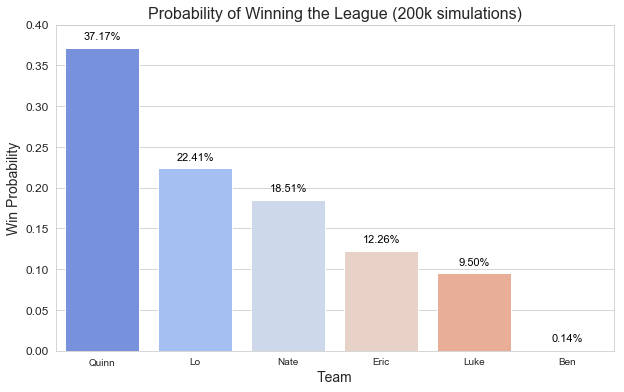

In [11]:
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("coolwarm"))

plt.figure(figsize=(10, 6))
sns.barplot(percent_df.Team, percent_df['Win Probability'])

for i, row in percent_df.iterrows():
    plt.text(  i
             , row[1]+.01
             , s="{:.2%}".format(round(row[1], 5))
             , color='black'
             , ha="center"
             , fontsize=11
            )
    
plt.yticks(fontsize=12)
plt.title('Probability of Winning the League (200k simulations)', fontsize=16)
plt.ylabel('Win Probability', fontsize=14)
plt.xlabel('Team', fontsize=14)
plt.ylim(0, .4)

plt.savefig('results.png')

plt.show()

# Lo's League

In [246]:
df = pd.read_csv('lo_fantasy.csv')
df = df[df.Week>=7]
df.head()

,Week,Lo,Dylan,Krieger,North,Jake,Peter
7,8,155.96,162.59,115.21,140.62,92.22,121.54
8,9,153.05,109.69,95.84,114.90,78.94,119.24
9,10,93.88,101.60,116.46,90.85,131.45,124.86
10,11,116.82,140.21,174.80,130.10,156.53,96.32
11,12,145.67,170.23,87.95,76.77,125.05,119.63


In [247]:
players = {
    'Lo': {'mean_score':df['Lo'].mean()
            ,'stdev_score':df['Lo'].std()},
    'Dylan': {'mean_score':df['Dylan'].mean()
            ,'stdev_score':df['Dylan'].std()},
    'Krieger': {'mean_score':df['Krieger'].mean()
            ,'stdev_score':df['Krieger'].std()},
    'North': {'mean_score':df['North'].mean()
            ,'stdev_score':df['North'].std()},
    'Jake': {'mean_score':df['Jake'].mean()
            ,'stdev_score':df['Jake'].std()},
    'Peter': {'mean_score':df['Peter'].mean()
            ,'stdev_score':df['Peter'].std()},
}

In [248]:
def simulate():
    
    quarterfinal1 = matchup('Lo', 'Peter')
    quarterfinal2 = matchup('Krieger', 'North')

    
    semifinal1 = matchup('Dylan', quarterfinal1)
    semifinal2 = matchup('Jake', quarterfinal2)
    

    final = matchup(semifinal1, semifinal2)
    
    return final 
    

In [249]:
wins = []

for i in range(100000):
    wins.append(simulate())

In [244]:
percents = pd.Series(wins).value_counts(normalize=True, 
                                        sort=True, 
                                        ascending=False, 
                                        bins=None, 
                                        dropna=True
                                       )

percents

Dylan      0.40954
Lo         0.21794
Jake       0.17927
Krieger    0.10224
North      0.05271
Peter      0.03830
dtype: float64

In [250]:
percent_df = pd.DataFrame(percents, columns=['Win Probability']).reset_index()
percent_df.head()

,index,Win Probability
0,Dylan,0.40954
1,Lo,0.21794
2,Jake,0.17927
3,Krieger,0.10224
4,North,0.05271


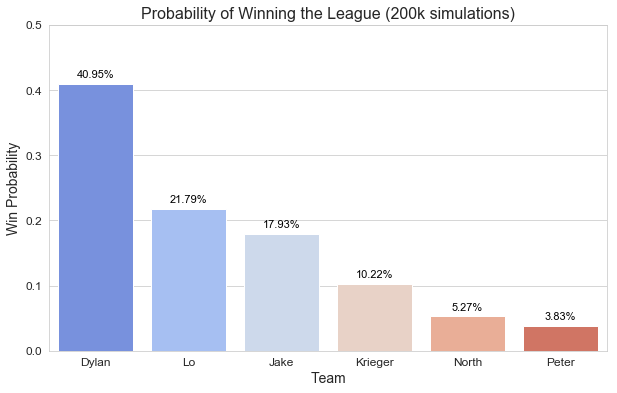

In [251]:
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("coolwarm"))

plt.figure(figsize=(10, 6))
sns.barplot(percent_df.index, percent_df['Win Probability'])

for i, row in percent_df.iterrows():
    plt.text(  i
             , row[1]+.01
             , s="{:.2%}".format(round(row[1], 5))
             , color='black'
             , ha="center"
             , fontsize=11
            )
    
plt.xticks(range(6), percent_df['index'], fontsize=12)
plt.yticks(fontsize=12)
plt.title('Probability of Winning the League (200k simulations)', fontsize=16)
plt.ylabel('Win Probability', fontsize=14)
plt.xlabel('Team', fontsize=14)
plt.ylim(0, .5)
plt.show()

# DKE League

In [33]:
df = pd.read_csv('fantasy_football_sim_dke.csv')
df = df[df.Week>=1]
df.head()

,Week,Eric,Caltz,Slum,Na,Zack,Kinnaird
0,1,125.14,103.90,134.66,130.98,124.68,74.54
1,2,119.10,142.96,163.40,158.30,111.28,106.88
2,3,99.58,140.58,119.82,151.44,116.08,114.40
3,4,120.18,124.92,115.58,140.72,144.00,110.14
4,5,88.44,129.30,106.46,96.64,120.14,118.20


In [46]:
players = {
    'Eric': {'mean_score':df['Eric'].mean()
            ,'stdev_score':df['Eric'].std()},
    'Caltz': {'mean_score':df['Caltz'].mean()
            ,'stdev_score':df['Caltz'].std()},
    'Slum': {'mean_score':df['Slum'].mean()
            ,'stdev_score':df['Slum'].std()},
    'Na': {'mean_score':df['Na'].mean()
            ,'stdev_score':df['Na'].std()},
    'Zack': {'mean_score':df['Zack'].mean()
            ,'stdev_score':df['Zack'].std()},
    'Kinnaird': {'mean_score':df['Kinnaird'].mean()
            ,'stdev_score':df['Kinnaird'].std()},
}

players['Slum']['mean_score'] = players['Slum']['mean_score']-10

In [47]:
def simulate():
    
    quarterfinal1 = matchup('Kinnaird', 'Caltz')
    quarterfinal2 = matchup('Zack', 'Eric')

    
    semifinal1 = matchup('Na', quarterfinal1)
    semifinal2 = matchup('Slum', quarterfinal2)
    

    final = matchup(semifinal1, semifinal2)
    
    return final 
    

In [48]:
wins = []

for i in range(100000):
    wins.append(simulate())

In [49]:
percents = pd.Series(wins).value_counts(normalize=True, 
                                        sort=True, 
                                        ascending=False, 
                                        bins=None, 
                                        dropna=True
                                       )

percents

Na          0.35887
Slum        0.25286
Caltz       0.17154
Zack        0.09386
Eric        0.06742
Kinnaird    0.05545
dtype: float64

In [50]:
percent_df = pd.DataFrame(percents, columns=['Win Probability']).reset_index()
percent_df.head()

,index,Win Probability
0,Na,0.35887
1,Slum,0.25286
2,Caltz,0.17154
3,Zack,0.09386
4,Eric,0.06742


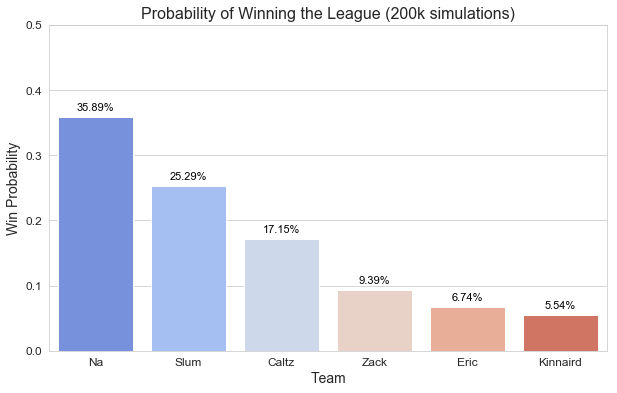

In [51]:
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("coolwarm"))

plt.figure(figsize=(10, 6))
sns.barplot(percent_df.index, percent_df['Win Probability'])

for i, row in percent_df.iterrows():
    plt.text(  i
             , row[1]+.01
             , s="{:.2%}".format(round(row[1], 5))
             , color='black'
             , ha="center"
             , fontsize=11
            )
    
plt.xticks(range(6), percent_df['index'], fontsize=12)
plt.yticks(fontsize=12)
plt.title('Probability of Winning the League (200k simulations)', fontsize=16)
plt.ylabel('Win Probability', fontsize=14)
plt.xlabel('Team', fontsize=14)
plt.ylim(0, .5)

plt.savefig('dke_results.png')

plt.show()